## Analyzing Child Blood Lead Levels

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import folium
import plotly.io as pio
import plotly.express as px

In [2]:
df = gpd.read_file('child_blood_lead_levels_by_ct.geojson')

In [3]:
#dropping variables that have no data
df = df.dropna(axis=1,how="all")

In [4]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   census_tract   380 non-null    object  
 1   data_redacted  380 non-null    bool    
 2   num_bll_5plus  251 non-null    float64 
 3   num_screen     372 non-null    float64 
 4   perc_5plus     254 non-null    float64 
 5   geometry       380 non-null    geometry
dtypes: bool(1), float64(3), geometry(1), object(1)
memory usage: 15.3+ KB


In [5]:
# renaming columns
columns = list(df)
columns

['census_tract',
 'data_redacted',
 'num_bll_5plus',
 'num_screen',
 'perc_5plus',
 'geometry']

In [6]:
#keeping the same sequence, now renaming the columns
df.columns = ['tracts',
               'redacted data',
               'number of lead levels above 5',
               'number of children screened',
               'percent of children with lead levels above 5',
               'geometry',
              ]

In [7]:
df.sample(5)

,tracts,redacted data,number of lead levels above 5,number of children screened,percent of children with lead levels above 5,geometry
135,42101018800,False,66.0,742.0,8.9,"POLYGON ((-75.09843 39.99908, -75.09795 39.998..."
76,42101008000,False,16.0,246.0,6.5,"POLYGON ((-75.22524 39.94776, -75.22533 39.947..."
267,42101028600,False,53.0,532.0,10.0,"POLYGON ((-75.12198 40.03373, -75.12179 40.033..."
133,42101013700,False,22.0,333.0,6.6,"POLYGON ((-75.18898 39.97982, -75.18866 39.981..."
37,42101003001,False,14.0,260.0,5.4,"POLYGON ((-75.16896 39.92804, -75.16923 39.926..."


In [8]:
df.describe()

,number of lead levels above 5,number of children screened,percent of children with lead levels above 5
count,251.000000,372.000000,254.000000
mean,17.629482,225.129032,5.858661
std,14.603362,143.475533,3.939310
min,0.000000,6.000000,0.000000
25%,7.000000,112.750000,3.225000
50%,14.000000,204.500000,5.700000
75%,26.000000,298.750000,8.475000
max,81.000000,846.000000,17.600000


In [9]:
df['tracts'] = df['tracts'].astype('str')

In [11]:
df.sample(5)

,tracts,redacted data,number of lead levels above 5,number of children screened,percent of children with lead levels above 5,geometry
260,42101027902,True,NaN,89.0,NaN,"POLYGON ((-75.15967 40.03508, -75.15915 40.035..."
53,42101004202,True,NaN,221.0,NaN,"POLYGON ((-75.15656 39.91558, -75.15653 39.915..."
374,42101980100,True,NaN,NaN,NaN,"POLYGON ((-75.22445 40.07912, -75.22346 40.078..."
2,42101000300,True,NaN,110.0,NaN,"POLYGON ((-75.17821 39.95981, -75.17743 39.959..."
129,42101013402,True,NaN,98.0,NaN,"POLYGON ((-75.17248 39.96564, -75.17241 39.965..."


In [12]:
tracts=gpd.read_file('Census_Tracts_2010 (2).geojson')
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [13]:
tracts = tracts[['TRACTCE10','geometry']]
tracts.head()

,TRACTCE10,geometry
0,009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [14]:
tracts['FIPS'] ='42' + '101' + tracts['TRACTCE10']

In [15]:
logan_FIPS = ["42101028000", "42101028100", "42101028200", "42101028300", "42101028400", "42101028500"]

logan_tracts = tracts[tracts['FIPS'].isin(logan_FIPS)]

logan_boundary = logan_tracts.dissolve()

Text(0.5, 1.0, 'Number of lead levels above 5')

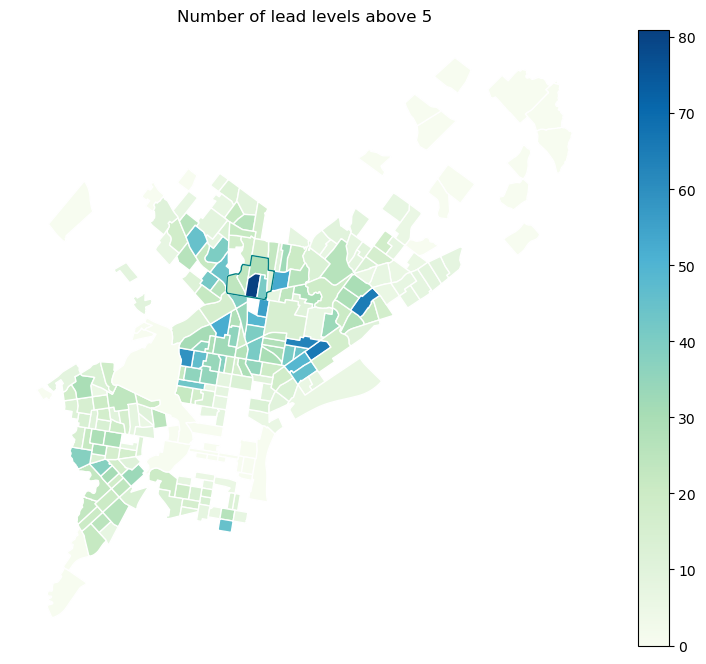

In [67]:
fig, ax = plt.subplots(figsize = (10,8)) 
df.plot(column = 'number of lead levels above 5',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)

logan_boundary.geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 1,ax=ax)

ax.axis('off')
plt.title('Number of lead levels above 5')

Text(0.5, 1.0, 'Percent of Children with Blood Lead Levels Above Five')

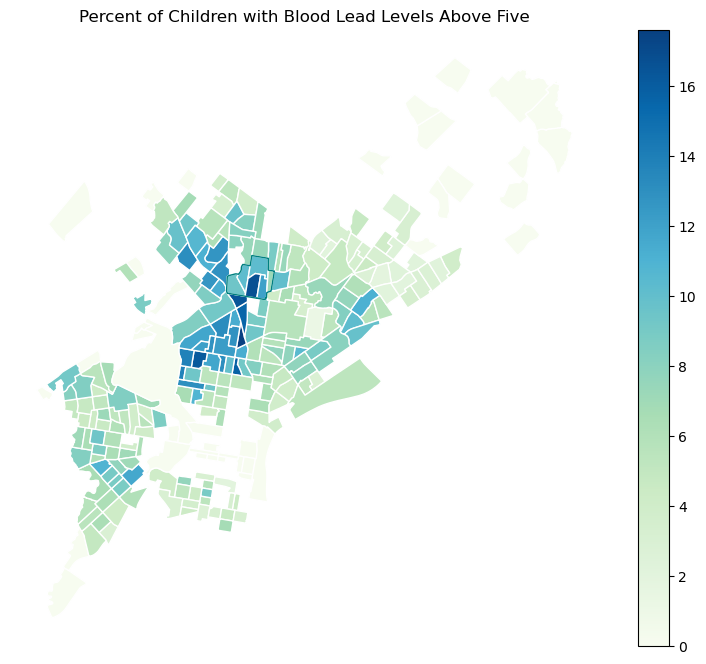

In [16]:
fig, ax = plt.subplots(figsize = (10,8)) 
df.plot(column = 'percent of children with lead levels above 5',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)

logan_boundary.geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 1,ax=ax)

ax.axis('off')
plt.title('Percent of Children with Blood Lead Levels Above Five')

Text(0.5, 1.0, 'Number of Children Screened')

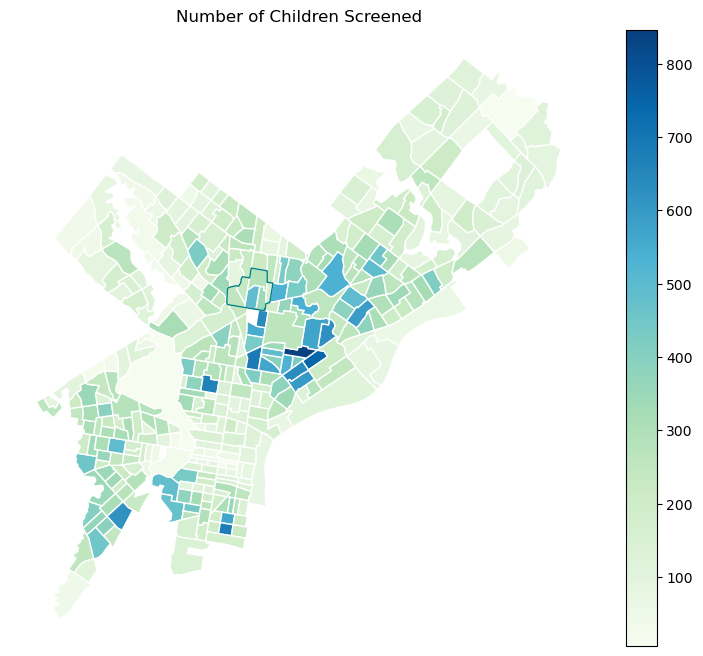

In [52]:
fig, ax = plt.subplots(figsize = (10,8)) 
df.plot(column = 'number of children screened',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},edgecolor='white',cmap = 'GnBu',ax=ax)

logan_boundary.geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 1,ax=ax)

ax.axis('off')
plt.title('Number of Children Screened')

Even the sample is low in the Logan Neighborhood, it's still the highest neighborhood in Philadelphia with children with blood leavels above 5 percent.

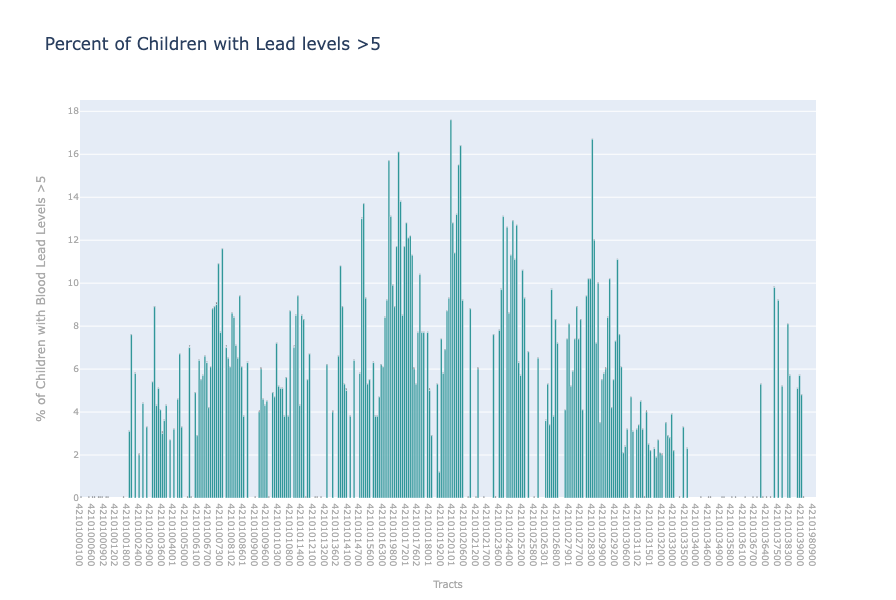

In [65]:
# bar chart
fig = px.bar(df,
        x='tracts',
        y='percent of children with lead levels above 5',
        title="Percent of Children with Lead levels >5", # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['teal']*len('filingrate'), # single color for all the bars
        labels={
                'tracts': 'Tracts',
                'percent of children with lead levels above 5': '% of Children with Blood Lead Levels >5',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

In [77]:
df.loc[df['tracts'] == '42101028000', 'color'] = 'blue'
df.loc[df['tracts'] == '42101028100', 'color'] = 'darkblue'
df.loc[df['tracts'] == '42101028200', 'color'] = 'orange'
df.loc[df['tracts'] == '42101028300', 'color'] = 'beige'
df.loc[df['tracts'] == '42101028400', 'color'] = 'darkpurple'
df.loc[df['tracts'] == '42101028500', 'color'] = 'green'

In [80]:
# add the stations with color icons
for index, row in df.iterrows():
    tooltip_text = row.tracts + ' tracts: ' + row.tracts
    folium.Marker(
        [row.geometry,row.geometry], 
        popup=row.tracts, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m)

# show the map
m

/tmp/ipykernel_1397/1183733312.py:8: UserWarning:

color argument of Icon should be one of: {'green', 'orange', 'red', 'darkred', 'black', 'white', 'darkgreen', 'lightblue', 'blue', 'purple', 'cadetblue', 'pink', 'lightgray', 'lightgreen', 'beige', 'darkblue', 'darkpurple', 'lightred', 'gray'}.



ValueError: Location should consist of two numerical values, but <POLYGON ((-75.141 39.952, -75.142 39.951, -75.142 39.95, -75.142 39.95, -75...> of type <class 'shapely.geometry.polygon.Polygon'> is not convertible to float.

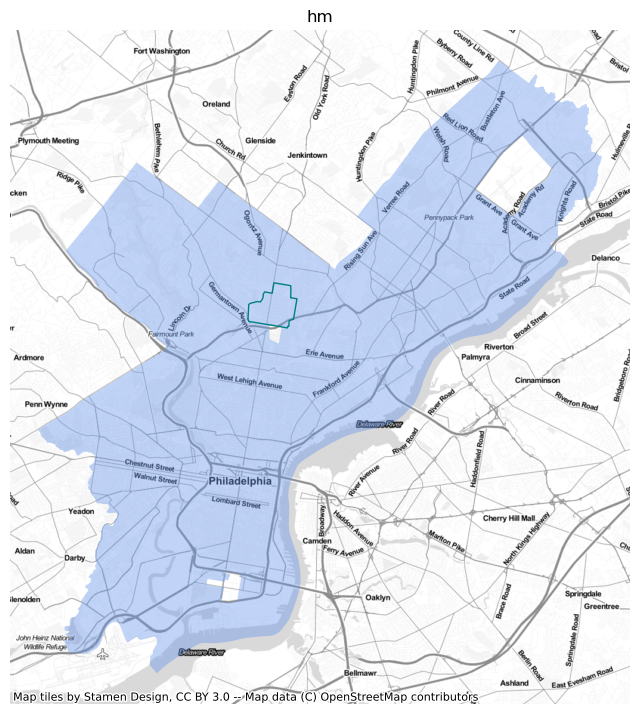

In [71]:
fig, ax = plt.subplots(figsize=(8,10))

df.to_crs(3857).plot(ax=ax, 
        marker='o',
        markersize=30,
        color='cornflowerblue',
        alpha=0.4)

ax.axis('off')


ax.set_title('hm')

logan_boundary.to_crs(3857).geometry.boundary.plot(color=None,edgecolor='teal',linewidth = 1,ax=ax)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)

"42101028000", "42101028100", "42101028200", "42101028300", "42101028400", "42101028500